# Gaussian Naive Bayes From Scratch
## Abstract
This activity present a from-scratch implementation of Gaussian Naive Bayes classifier starting directly from the mathematical foundations. We arrive to the Gaussian Naive Bayes introducing also the logarithm and then all the equation is trnaslated into the python code. The model is then tested on two real datasets, the **Banknote Authentication** dataset and the **Breast Cancer** dataset. Exploratory data analysis is used to insepct the fature distribution and correlations, in order to check how well each dataset satisfies the Gaussian shape and indipendence assumption required by GNB.
Then we train the model for each dataset and compare the resoult with Accuracy and Confusion matrix.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"

In [69]:
df = pd.read_csv(url, header=None, names=["variance", "skewness", "curtosis", "entropy", "class"])

X = df.drop(columns = "class")
y = df["class"]

## Data Explotation Bankonote Dataset

In [70]:
# Check for missing values
df.isna().sum().sum()

np.int64(0)

In [71]:
# Basic statistics of the dataset
X.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495


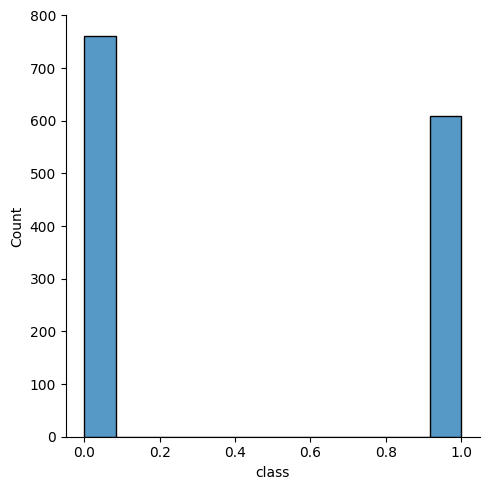

In [72]:
# Class balance
sns.displot(y)

<Axes: >

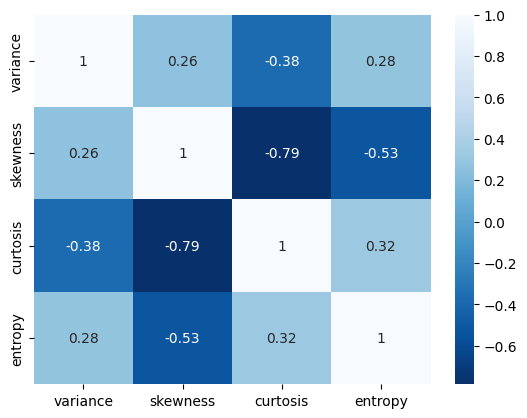

In [73]:
# Inspect feature correlations with the heatmap to see how much the indipendence assumptions of the Naive Bayes is violated
sns.heatmap(X.corr(), annot = True, cmap='Blues_r')

This correlational matrix show that some feature are clearly correlated like 'skewness' and 'curtosis'. This means Naive Bayes indipendence assumptions is violated.

array([[<Axes: title={'center': 'variance'}>,
        <Axes: title={'center': 'skewness'}>],
       [<Axes: title={'center': 'curtosis'}>,
        <Axes: title={'center': 'entropy'}>]], dtype=object)

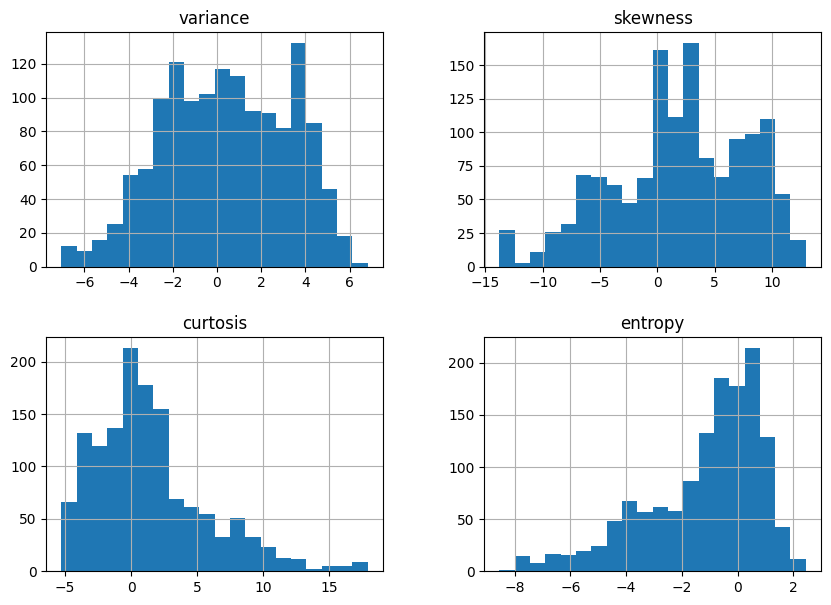

In [74]:
# Inspect feature distrivution to see if a Gaussian Model is reasonable for each feature
X.hist(bins=20, figsize=(10,7), layout=(2,2))

From the histograms we see that the most of orus featues has shape similar to a bell. This suggest that the gaussian assumption is not perfectly satisfied but still reasonavle as an approximation

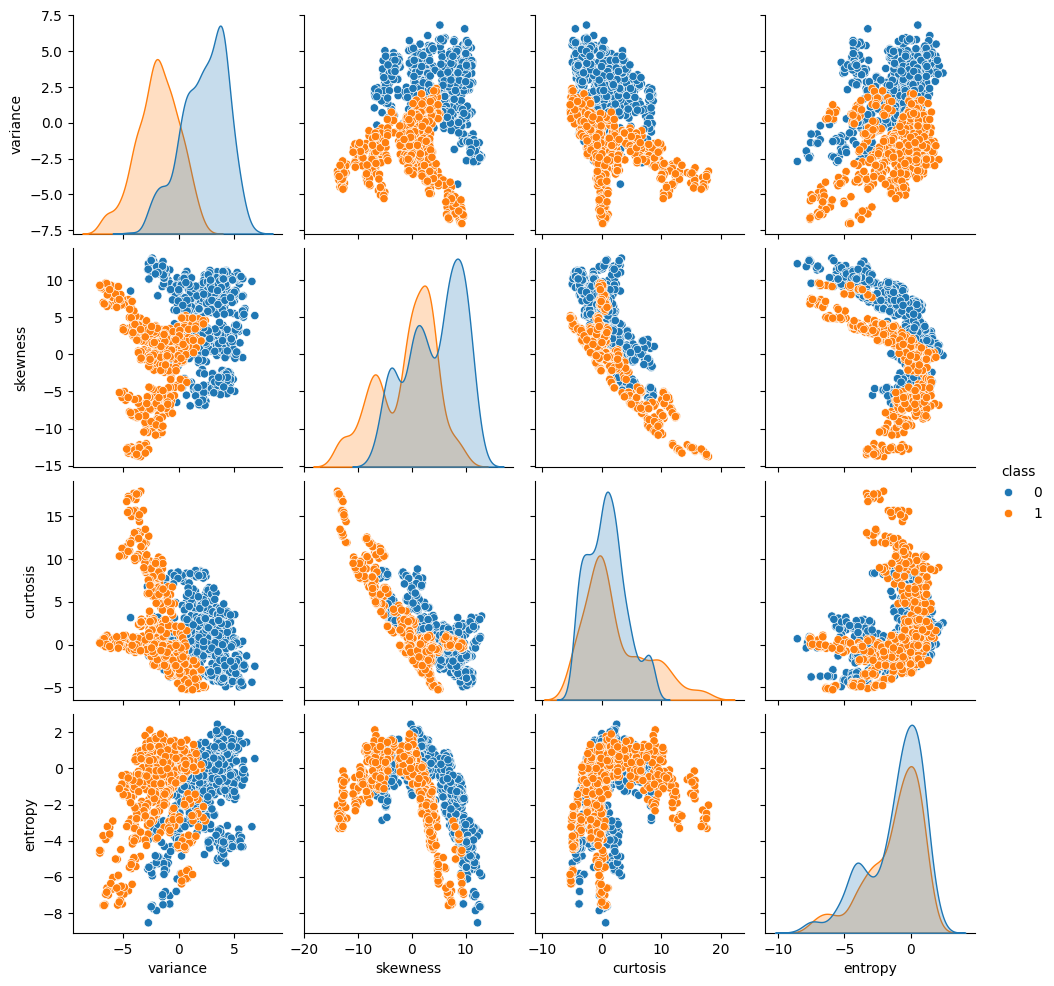

In [75]:
# Visualize class separablity
sns.pairplot(df,hue='class')

In this pairplot w see that the two classes in the majority of the plot occupy different regions of the feature space, so each feature carries strong information. This mean Gaussian Naive Bayes should still achive good classification performance.


## Overview of Bankonote Dataset
For understend if the Gaussian Naive Bayes is suitable in this dataset we have to inspect expecially two things the feature distribution and the correlation.
In this dataset the Gaussian assumption is only partially true, some features are close to normal other are not, this means the model give an approximation of the real data distribution.

In the correlation heatmap we see the feature are not totalt indipendent, so the Naive assumption is violated so the model will treat the feature as indipendent which can limit the performance



---

## Gaussian Naive Bayes from Scratch

Gaussian Naive Bayes is an classification algorithm, is usefull for for continus numerical data. From the name this algorithm assumes that the feature follow a Gaussian distribution within each class. This makes the model especially effective when the data approximately satisfies this condition. The algorithm is based on Bayes’ Theorem, which makes it a probabilistic classifier. The Naive refers to the simplifyng assumption that all features are indipendent given the class label.

**Core Assumptions of the Model**
- Gaussian (Normal) Distribution, each feature is assumed to follow a normal distrivution
- Feature Indipendence, all features are assumed to be indipendent between eeachother.


### 1. Bayes Theorem
Gaussian Naive Bayes is based on Bayes'Theorem which describe how to compute the probability of a class given the data:
$$ P(y=k∣x)= \frac{P(y=k)⋅P(x∣y=k)}{P(x)}​  \qquad (1)$$
Since $P(x)$ is the sama foe each classes we can ignore it:

$$ P(y=k∣x)= P(y=k)⋅P(x∣y=k)​  \qquad (2)$$



### 2. Naive Assumption
Naive Bayes assumes that all features are conditionally independent given the class.
$$
P(x \mid y = k)= \prod_{j=1}^{d} P(x_j \mid y = k)
\qquad (3) $$
Substitute into Equation $(1)$:
$$
P(y = k \mid x) = P(y = k) \prod_{j=1}^{d} P(x_j \mid y = k) \qquad (4)
$$

### 3. Gaussian Distribution
Since the features are continues, the model assumes each feature follow a normal distribution

$$
P(x_j \mid y = k) = \mathcal{N}(x_j; \mu_{kj}, \sigma_{kj}^2) \qquad (5)
$$


- $\mu_{kj}$ is the mean of feature $j$ in class $k$
- $\sigma^2_{kj}$ is the variance of feature $j$ in class $k$
Can be written as:
$$ P(x_j \mid y = k) = \frac{1}{\sqrt{2\pi\sigma_{kj}^2}} ⋅ \left( -\frac{(x_j - \mu_{kj})^2}{2\sigma_{kj}^2} \right) \qquad (6) $$

Mean calculation:
$$
\mu_{kj} = \frac{1}{N_k} \sum_{i : y_i = k} x_{ij}
\qquad (7)
$$
Variance Calculation:
$$
\sigma_{kj}^2 = \frac{1}{N_k} \sum_{i : y_i = k} (x_{ij} - \mu_{kj})^2 \qquad (8)
$$

### 4. Final Prediction Formula
Sobstitute equation $(3)$ into equation $(2)$

$$
P(y = k \mid x) = P(y = k) \prod_{j=1}^{d} \frac{1}{\sqrt{2\pi\sigma_{kj}^2}} ⋅\left( -\frac{(x_j - \mu_{kj})^2} {2\sigma_{kj}^2} \right) \qquad (9)
$$
Prior calculation:
$$ P(y = k) = \frac{N_k}{N} \qquad (10)
$$



### 5. Introducing Log
Multipling small probabilities leads to numerical underflow (num become to small for computer to comput) so introducing the logarithm.

Final form with Log:
$$
\log P(y = k \mid x) = \log P(y = k) + \sum_{j=1}^{d} \left[ -\frac{1}{2} \log(2\pi\sigma_{kj}^2) - \frac{(x_j - \mu_{kj})^2} {2\sigma_{kj}^2} \right] \qquad (11)
$$

### 6. Final Decision Rule
In order to resolve the classification problem, the predict class is the one with the maximum probability:
$$
\hat{y} = \arg\max_k \log P(y = k \mid x) \qquad (12)
$$




In [76]:
# Class of the Model
class GaussianNaiveBayes:

  # train our model base on the data that is provide
  def fit(self, X, y):
     # what class we have
    self.classes = np.unique(y)
    # get the dimension of y and X
    n_classes = len(self.classes)
    n_features = X.shape[1]

    # prepare array
    self.means = np.zeros((n_classes, n_features))
    self.variance = np.zeros((n_classes, n_features))
    self.prior = np.zeros(n_classes)

    # Loop over the classes
    for i, k in enumerate(self.classes):
      # Matrix with input data where the correct classification is k
      Xk = X[y == k]

      # Compute this values for this particulare set of data stored in the matrix where y==k
      # Store mean in array at i index
      self.means[i] = Xk.mean(axis=0)   #(7)
      # Store variance in array at i index
      self.variance[i] = Xk.var(axis=0)   #(8)
      # Store the prior in array at i index for matrix Xk
      self.prior[i] = Xk.shape[0] / X.shape[0]  #(10)

    return self

  # This fucntion compute the gaussian with the log
  def log_gaussian(self, X):
    # right side
    num = -0.5 * (X[:, None, :] - self.means)**2 / self.variance  # part of (11)
    # left side
    log_prob = num - 0.5 * np.log(2 * np.pi * self.variance)    # part of (11)
    # return whit adding the sum
    return log_prob.sum(axis=2)   # from sum (11)


  def predict(self, X):
    X = np.asarray(X)
    # call and store the gaussian
    gaussian = self.log_gaussian(X)
    # computing the prior
    log_prior = np.log(self.prior)  # first part of (11)

    return self.classes[np.argmax(gaussian + log_prior, axis=1)]  #(12)



In [77]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNaiveBayes()
model.fit(X_train, y_train)
# Predicting with ours model
y_pred = model.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy:", accuracy)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Positives: ", tp)
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)

Accuracy: 0.8072727272727273
True Positives:  89
True Negatives:  133
False Positives:  15
False Negatives:  38


## Comparison with Breast Cancer Dataset

In [78]:
from sklearn.datasets import load_breast_cancer

In [79]:
# Load with Pandas for some data exploration
# load the data from sklearn
data = load_breast_cancer()
# Split
Xb = pd.DataFrame(data.data, columns=data.feature_names)
yb = pd.Series(data.target, name = "target")
Xb.shape

(569, 30)

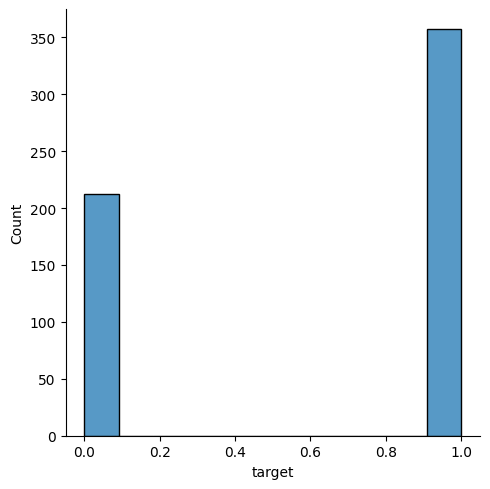

In [80]:
# Class balance
sns.displot(yb)

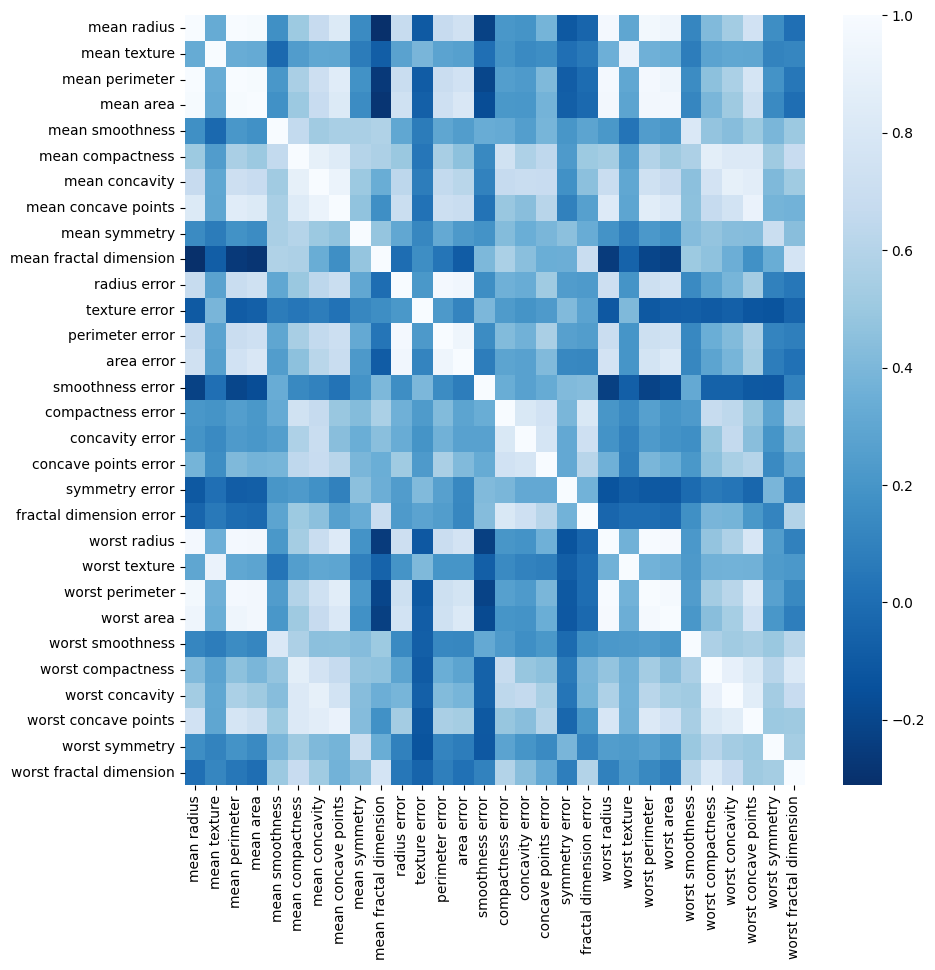

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(Xb.corr(), cmap='Blues_r')
plt.show()

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>],
       [<Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>,
        <Axes: title={'center': 'mean compactness'}>],
       [<Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>],
       [<Axes: title={'center': 'mean fractal dimension'}>,
        <Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>],
       [<Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>],
       [<Axes: title={'center': 'compactness error'}>,
        <Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>],
       [<Axes: title={'center': 'symmetry error

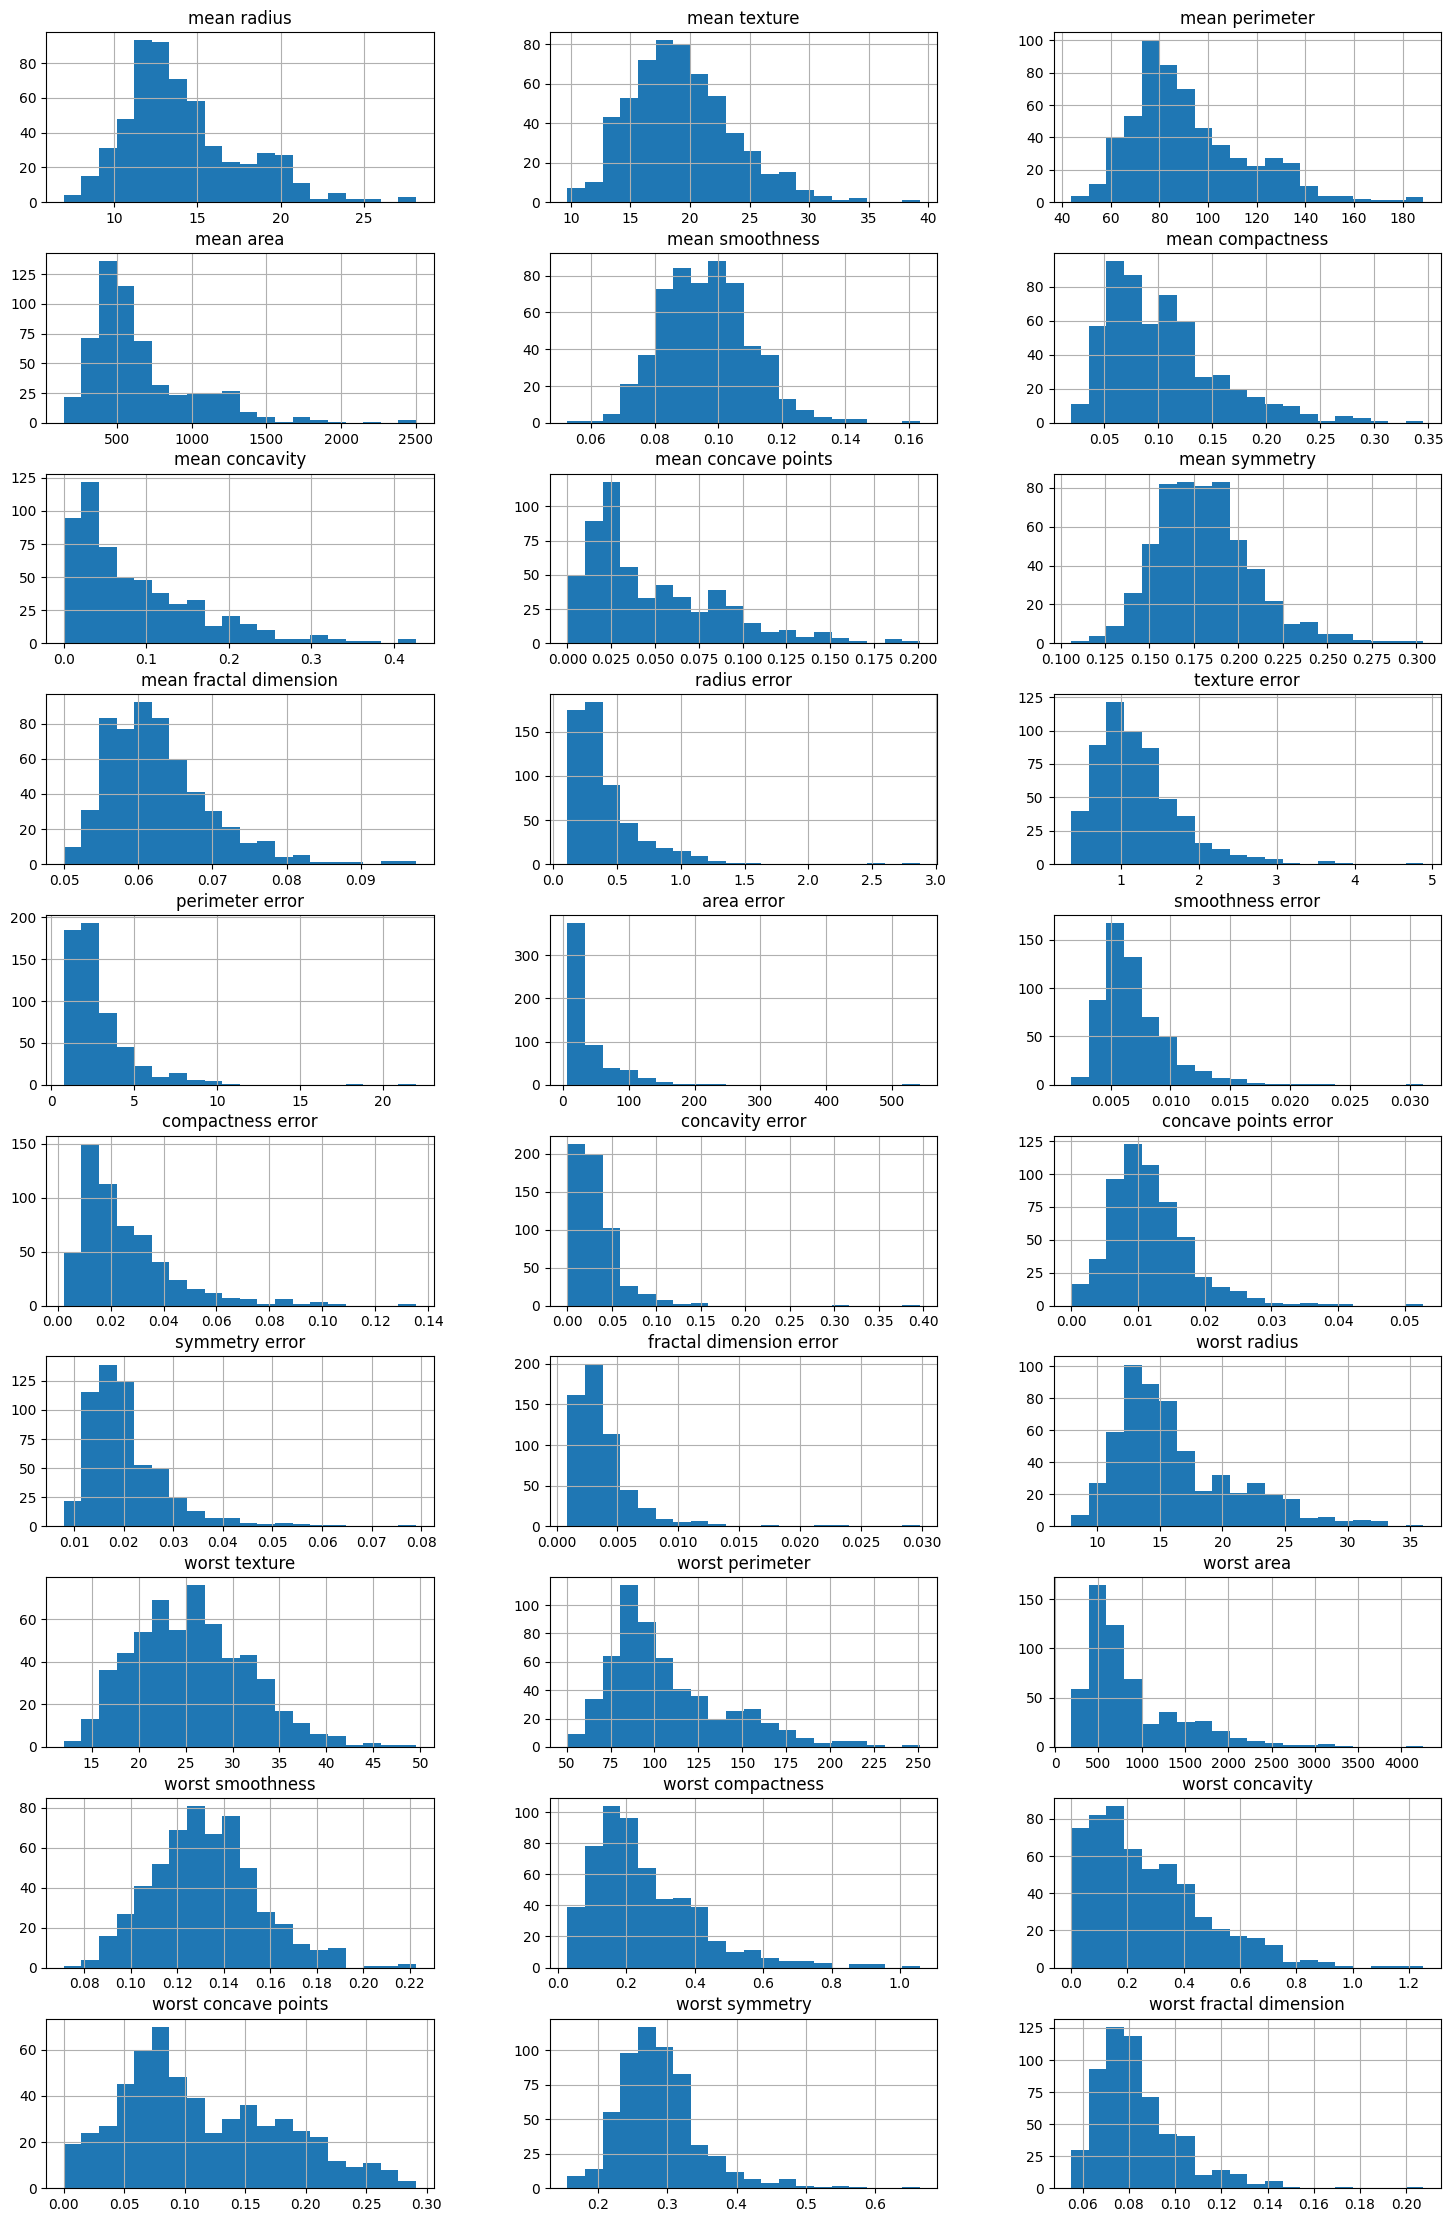

In [82]:
Xb.hist(bins=20, figsize=(18,28), layout=(10,3))

## Overview of the dataset

For evaluating how suitable is this dataset for our model we check correlation and distribution.

From the istograms of all 30 features we see the gaussian distribution is reasonable for a large part of the feature space, this help the model to it better.

The correlation matrix show that a small correlation between some feature is present, but is less strong then the previus dataset, the model can stull perform well.

In [83]:
# Convert in np array
X_b = np.asarray(Xb)
y_b = np.asarray(yb)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, test_size=0.2, random_state=42)

model = GaussianNaiveBayes()
# Fit the model with data
model.fit(X_train, y_train)
# Prediction
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy:", accuracy)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Positives: ", tp)
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)

Accuracy: 0.9649122807017544
True Positives:  70
True Negatives:  40
False Positives:  3
False Negatives:  1


## Comparison between dataset

After implementing Gaussian Naive Bayes from scratch i evaluate the model on two different datasets with different level of compatibility with the Gaussian and Indipendence assumption.

**Bankonote Authentication**

The overall accuracy is decent but the confusion matrix shows relativity high number of false negatives. This resoults are in line with the earlier exploration that shows several features clearly do not follow a Gaussian distribution and there are strong correlation between same features so Naive indipendence assumption si violated.

**Breast Cancer**

Here the model perfom much better, with very few misclassification. This match what we see in the explorative analysis, many feature with roughly bell-shape distribution and feature still correlated, so the indipendece assumption is note perfect, but the approssmation work reasonably well.



## Clonclusion

In this activity i implemented Gaussian Naive Bayes from scratch, starting from its mathematical foundations and turning each key equation into code. By appling the model on real data i could see how its behaviour directly reflects the assumptions. Overall the activity higliths that understanding the math behind the model is essential for correctly implementing it, understanding and for interpreting its performance on different datasets.

